# Hans-EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/salary_cleaned.csv', index_col = None)
df.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,...,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,...,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,...,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,3,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),...,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,4,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),...,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,5,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,...,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [4]:
df.shape

(24496, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               24496 non-null  int64  
 1   timestamp                24496 non-null  object 
 2   company                  24496 non-null  object 
 3   level                    24496 non-null  object 
 4   title                    24496 non-null  object 
 5   totalyearlycompensation  24496 non-null  float64
 6   location                 24496 non-null  object 
 7   yearsofexperience        24496 non-null  float64
 8   yearsatcompany           24496 non-null  float64
 9   tag                      24496 non-null  object 
 10  year                     24496 non-null  int64  
 11  month                    24496 non-null  int64  
 12  year_month               24496 non-null  object 
 13  timestamp_3mos           24496 non-null  object 
 14  year_month_3mos       

In [6]:
df.drop(columns = ['Unnamed: 0', 'timestamp', 'location', 'timestamp_3mos', 'state'], inplace = True)

df.head()

,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,year,month,year_month,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,employment_rate,employment_rate_3mos
0,Yahoo,IC2,Software Engineer,160.5,0.58,0.58,Full Stack,2018,6,2018-06,2018-03,CA,0.029,0.024,0.957660,0.956797
1,Facebook,E3,Software Engineer,165.0,1.00,1.00,Full Stack,2018,6,2018-06,2018-03,WA,0.029,0.024,0.955998,0.954978
2,VmWare,Senior MTS,Software Engineer,218.0,8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03,CA,0.029,0.024,0.957660,0.956797
3,Uber,L4,Software Engineer,240.0,3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03,CA,0.029,0.024,0.957660,0.956797
4,Capital One,Master Software Engineer,Software Engineer,196.0,8.00,2.00,iOS,2018,6,2018-06,2018-03,NY,0.029,0.024,0.959053,0.955962


In [7]:
df.shape

(24496, 16)

In [8]:
# Looking for unique values in object type columns

for column in df:
    print(f'{column} : {sorted(list(df[column].unique()), reverse = True)[0:5]}')

company : ['zynga', 'zoox', 'zillow group', 'yahoo', 'workday']
level : ['Сontractor', '||', 'x6', 'vice president', 'unknown']
title : ['Technical Program Manager', 'Solution Architect', 'Software Engineering Manager', 'Software Engineer', 'Sales']
totalyearlycompensation : [4950.0, 2500.0, 2000.0, 1950.0, 1800.0]
yearsofexperience : [41.0, 40.0, 39.0, 37.0, 36.0]
yearsatcompany : [34.0, 32.0, 30.0, 28.0, 27.0]
tag : ['Èda ', 'ux', 'user Experience ', 'unix/linux', 'undecided']
year : [2020, 2019, 2018]
month : [12, 11, 10, 9, 8]
year_month : ['2020-09', '2020-08', '2020-07', '2020-06', '2020-05']
year_month_3mos : ['2020-06', '2020-05', '2020-04', '2020-03', '2020-02']
state_short : ['WV', 'WI', 'WA', 'VT', 'VA']
inflation_rate : [0.03, 0.029, 0.027, 0.025, 0.023]
inflation_rate_3mos : [0.03, 0.029, 0.028, 0.027, 0.025]
employment_rate : [0.9761019371782508, 0.9757459236538152, 0.9756963448367676, 0.9756554434044054, 0.9755781867221222]
employment_rate_3mos : [0.9763629979362656, 0.9

### As shown, in 'totalyearlycompensation' there are thousands which mean MILLIONS? , also I think we could limit employment rate to 3 decimals.

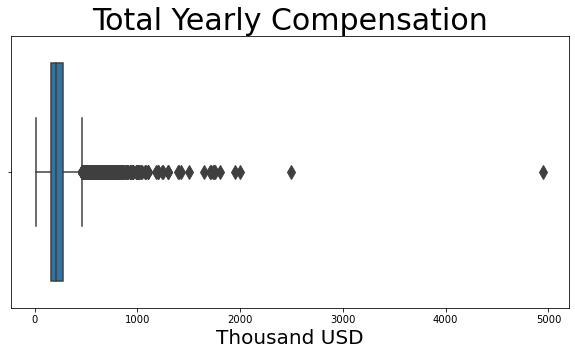

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['totalyearlycompensation'], fliersize = 10)
plt.title(label = 'Total Yearly Compensation', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Thousand USD', fontdict = {'size': 20}, loc = 'center');

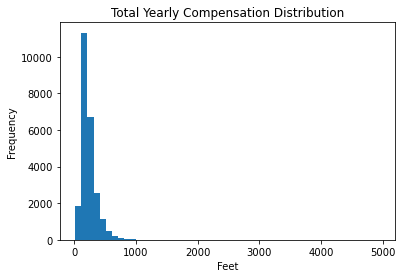

In [10]:
sp = (
    df['totalyearlycompensation']      
    .plot(
        kind='hist',
        title='Total Yearly Compensation Distribution',
        bins = 50
        )
)

sp.set(xlabel = 'Feet');

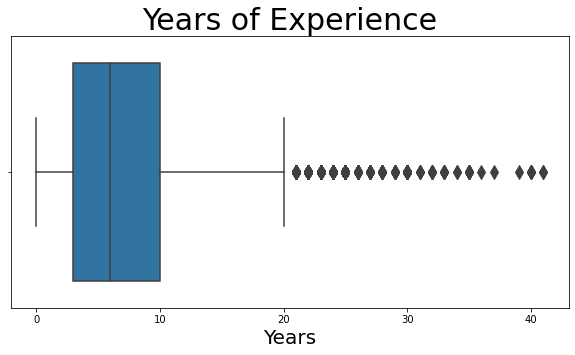

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['yearsofexperience'], fliersize = 10)
plt.title(label = 'Years of Experience', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center');

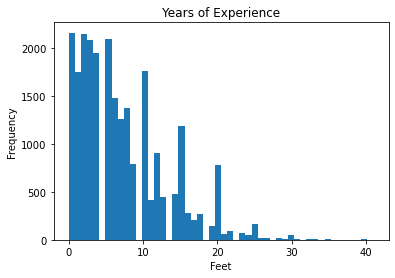

In [12]:
sp = (
    df['yearsofexperience']      
    .plot(
        kind='hist',
        title='Years of Experience',
        bins = 50
        )
)

sp.set(xlabel = 'Feet');

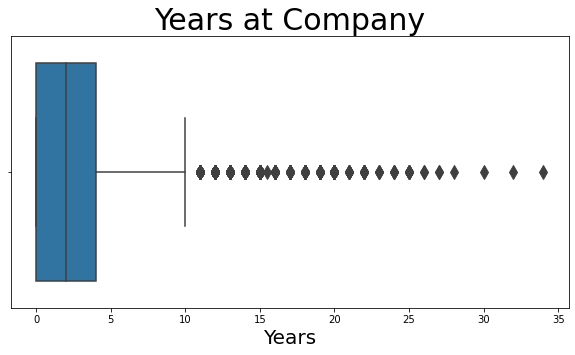

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['yearsatcompany'], fliersize = 10)
plt.title(label = 'Years at Company', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center');

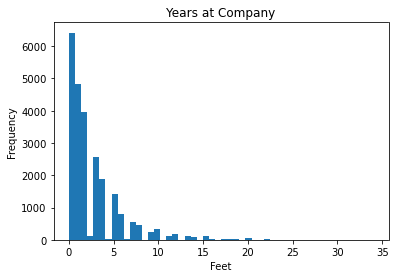

In [14]:
sp = (
    df['yearsatcompany']      
    .plot(
        kind='hist',
        title='Years at Company',
        bins = 50
        )
)

sp.set(xlabel = 'Feet');

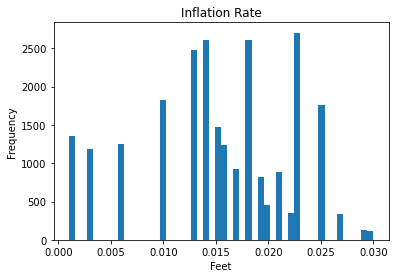

In [15]:
sp = (
    df['inflation_rate']      
    .plot(
        kind='hist',
        title='Inflation Rate',
        bins = 50
        )
)

sp.set(xlabel = 'Feet');

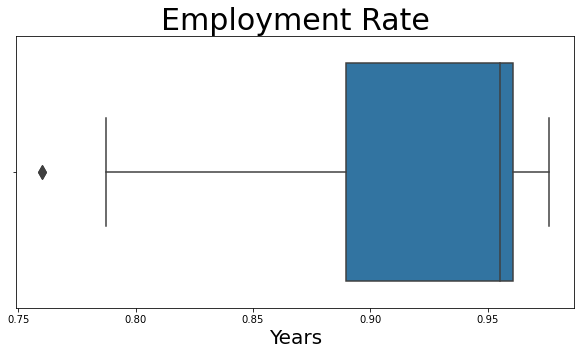

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['employment_rate'], fliersize = 10)
plt.title(label = 'Employment Rate', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center');

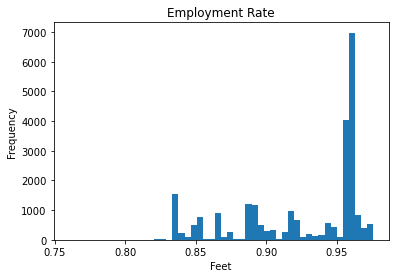

In [17]:
sp = (
    df['employment_rate']      
    .plot(
        kind='hist',
        title='Employment Rate',
        bins = 50
        )
)

sp.set(xlabel = 'Feet');

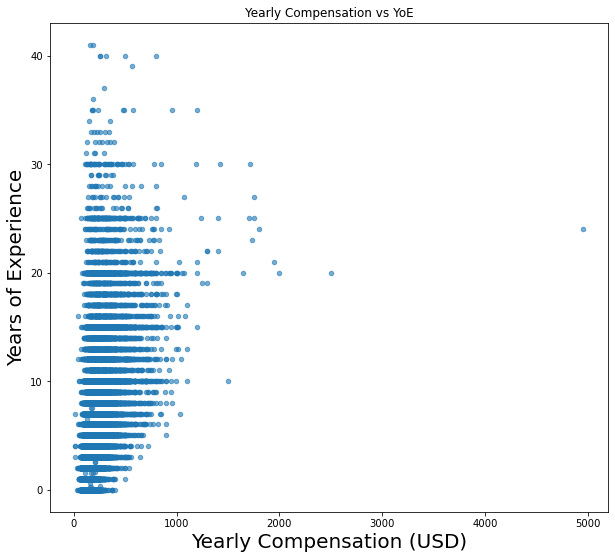

In [18]:
vs = df.plot(
    kind='scatter', 
    x='totalyearlycompensation',
    y='yearsofexperience',
    title="Yearly Compensation vs YoE",
    alpha=0.6, # set the opacity of the points (0 is completely transparent and 1 is opaque)
    figsize=(10,9)
)

vs.set_xlabel("Yearly Compensation (USD)", fontsize=20) # set the axes labels with a fontsize
vs.set_ylabel("Years of Experience", fontsize = 20);

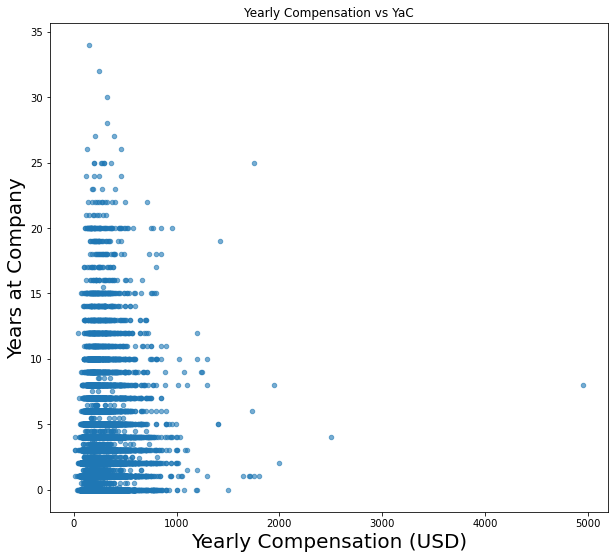

In [19]:
vs = df.plot(
    kind='scatter', 
    x='totalyearlycompensation',
    y='yearsatcompany',
    title="Yearly Compensation vs YaC",
    alpha=0.6, # set the opacity of the points (0 is completely transparent and 1 is opaque)
    figsize=(10,9)
)

vs.set_xlabel("Yearly Compensation (USD)", fontsize=20) # set the axes labels with a fontsize
vs.set_ylabel("Years at Company", fontsize = 20);

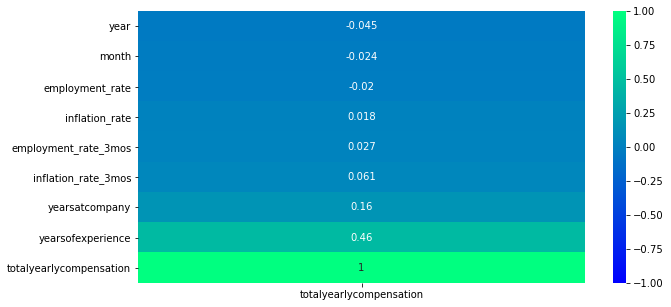

In [20]:
plt.figure(figsize=(10, 5))


corr = df.corr()[["totalyearlycompensation"]].sort_values(by='totalyearlycompensation') 
sns.heatmap(corr, cmap="winter", annot=True, vmin=-1, vmax=1);

Text(0.5, 1.0, 'Number of times states appear')

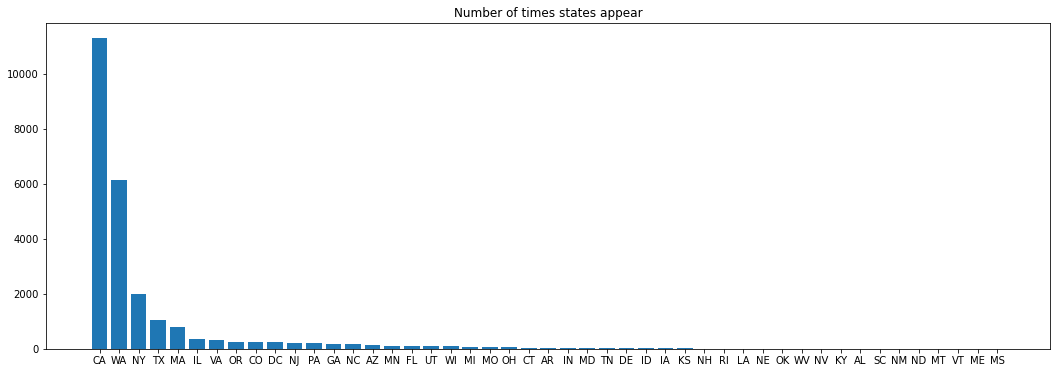

In [21]:
# Using the matplotlib bar function and methods

# Set the figure size
plt.figure(figsize=(18, 6))

# Make the plot
plt.bar(df['state_short'].value_counts().index,
        df['state_short'].value_counts())

# Add a title
plt.title('Number of times states appear')


In [22]:
df['state_short'].value_counts()

CA    11289
WA     6133
NY     1991
TX     1031
MA      788
IL      349
VA      330
OR      262
CO      255
DC      251
NJ      200
PA      196
GA      185
NC      171
AZ      153
MN      114
FL      110
UT       99
WI       85
MI       72
MO       70
OH       57
CT       39
AR       37
IN       34
MD       28
TN       26
DE       25
ID       15
IA       14
KS       12
NH       10
RI        9
LA        8
NE        7
OK        6
WV        5
NV        5
KY        5
AL        5
SC        4
NM        3
ND        2
MT        2
VT        2
ME        1
MS        1
Name: state_short, dtype: int64

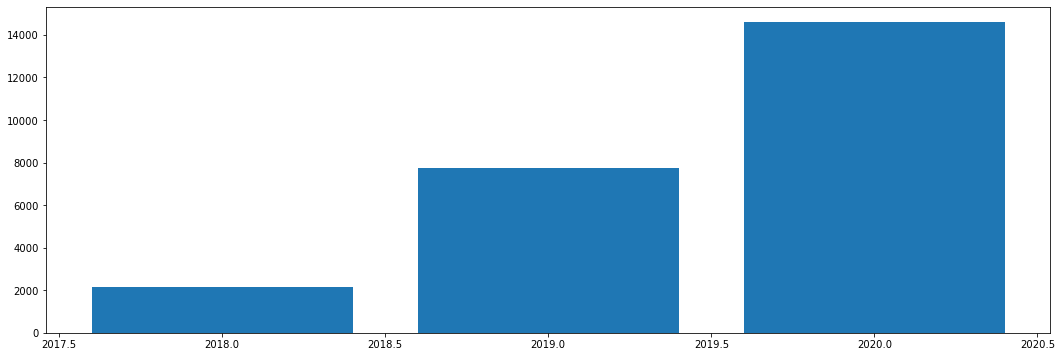

In [23]:
# Using the matplotlib bar function and methods

# Set the figure size
plt.figure(figsize=(18, 6))

# Make the plot
plt.bar(df['year'].value_counts().index,
        df['year'].value_counts());


In [24]:
df['title'].value_counts()

Software Engineer               16677
Product Manager                  1832
Software Engineering Manager     1404
Data Scientist                    996
Hardware Engineer                 909
Product Designer                  622
Technical Program Manager         411
Solution Architect                401
Management Consultant             294
Business Analyst                  230
Marketing                         210
Recruiter                         141
Sales                             141
Mechanical Engineer               137
Human Resources                    91
Name: title, dtype: int64

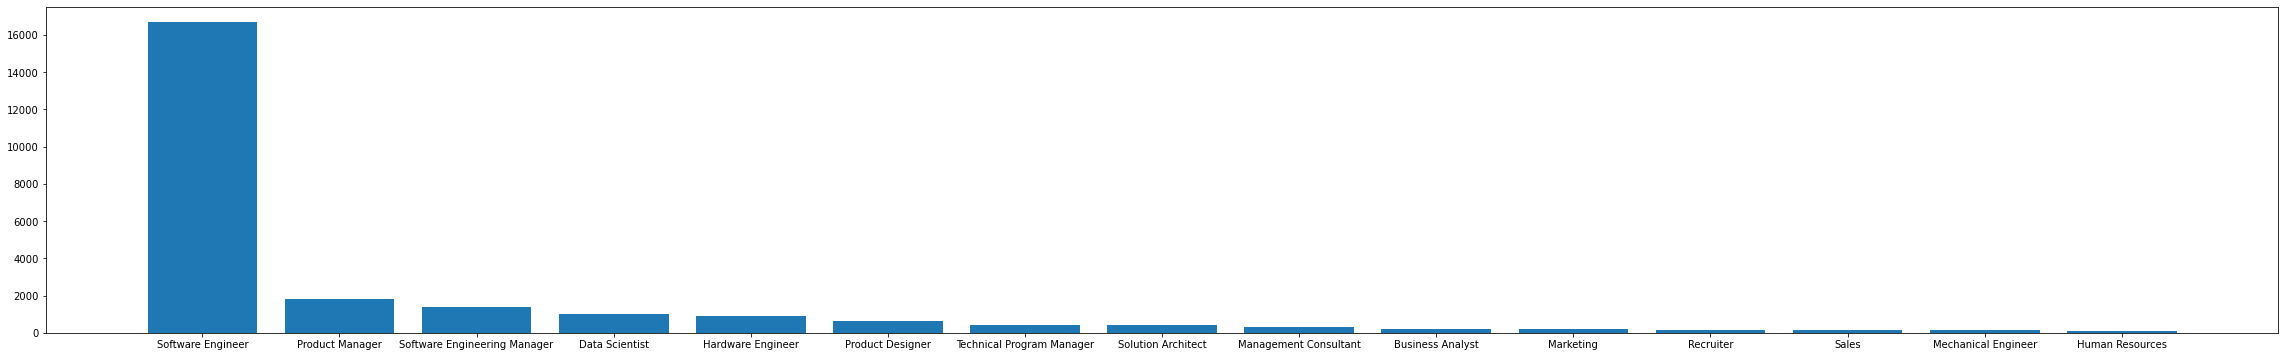

In [25]:
# Using the matplotlib bar function and methods

# Set the figure size
plt.figure(figsize=(40, 6))

# Make the plot
plt.bar(df['title'].value_counts().index,
        df['title'].value_counts());

In [26]:
df['level'].unique().sum()

'IC2E3Senior MTSL4Master Software Engineer61L31110Grade 10Senior64ICT3L08 Sr EngineerSoftware Engineer63PrincipalE45IC4P3L559MTS1T3LMTS7Principal Software EngineerL6Senior Software EngineerStaffSE 3ICT4LPB2ICT2T662IC3PrincipleL62Staff Software EngineerT214M2IC5Software Engineer 4senior associate6665Gr8SWE IISDE 26Band 82M4IIL0768G14Senior Product ManagerT4E213SMTSSenior Software Engineer IG5SDE IIsenior staffEng 1STAFF ENGINEERL66L4.5Senior AssociateSDE2278Grade 8E5L6 (Staff)E6MTS(member of technical staff)Distinguished Engineer4SDEIIISenior ManagerGrade 6Sr UX Researcher 4L64L1ManagerPrincipal SWESDE 3Lead Software EngineerL593M1Grade 12vice presidentL2ICT5MTSBand 469SE2I9ICT 3Senior SDE60Mts 158Grade 11Staff EngineerL60Master software engineerSDE IIIC E40M3Senior Software Engineer IIG6Software Engineer IIMTS 1SDE 4MTS 2Senior SWEL7Senior StaffSWE IIITechnical Leader 2Senior Engineering ManagerSoftware Engineer 2SWE 3Senior Software EngM6Associate EngineerIC-532SDE IL63Associate Membe

In [27]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation',
       'yearsofexperience', 'yearsatcompany', 'tag', 'year', 'month',
       'year_month', 'year_month_3mos', 'state_short', 'inflation_rate',
       'inflation_rate_3mos', 'employment_rate', 'employment_rate_3mos'],
      dtype='object')

In [47]:
df.groupby('title')['level'].unique()

title
Business Analyst                [L4, 62, L1, L5, T5, 10, L3, L6, Senior, Level...
Data Scientist                  [Senior, 64, Staff, T6, L5, 65, L6, II, Sr UX ...
Hardware Engineer               [ICT4, L2, icb6-master, ICT3, Senior Staff Eng...
Human Resources                 [Band 10, 63, 28, 22, IC5, L1, Manager, Analys...
Management Consultant           [Analyst, Manager, Business Technology Analyst...
Marketing                       [65, Director, Senior Manager, IC7, level 6, L...
Mechanical Engineer             [6, Senior, L2, V, Senior Engineer, G06, L6, G...
Product Designer                [64, Staff SWE, IC3, User experience designer,...
Product Manager                 [63, 7, Software Engineer 4, 6, L07, IC4, 68, ...
Recruiter                       [IC4, IC5, Support, Recruiter 2, L4, L6, L2, G...
Sales                           [Vice President, L6, 64, Sales Leader, Senior,...
Software Engineer               [IC2, E3, Senior MTS, L4, Master Software Engi...
Software E

In [46]:
for i in df.groupby('title')['level'].unique():
    print(len(i))

77
230
180
38
85
93
60
183
329
55
64
989
279
142
121


In [53]:
df.groupby('totalyearlycompensation')['level'].unique()

totalyearlycompensation
15.0      [Senior, l3, G13]
16.0                [Eng 3]
35.0        [Part Time SE1]
36.0               [fellow]
37.0               [Senior]
                ...        
1800.0                 [68]
1950.0                 [L8]
2000.0                [EVP]
2500.0                 [L8]
4950.0                 [80]
Name: level, Length: 714, dtype: object

In [54]:
df.groupby('company')['level'].unique()

company
 Bloomberg                      [Senior]
 Credit Karma                 [Senior 1]
23andMe            [Software Engineer I]
2U               [Software Engineer III]
3M                          [T3, T2, 10]
                          ...           
workday                             [P4]
yahoo                      [Senior, ic5]
zillow group                        [M5]
zoox                            [junior]
zynga                        [principle]
Name: level, Length: 1284, dtype: object